In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("Country-data.csv")
df = data.copy()
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

C:\Users\elwin\AppData\Local\Temp/ipykernel_162792/3351747224.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

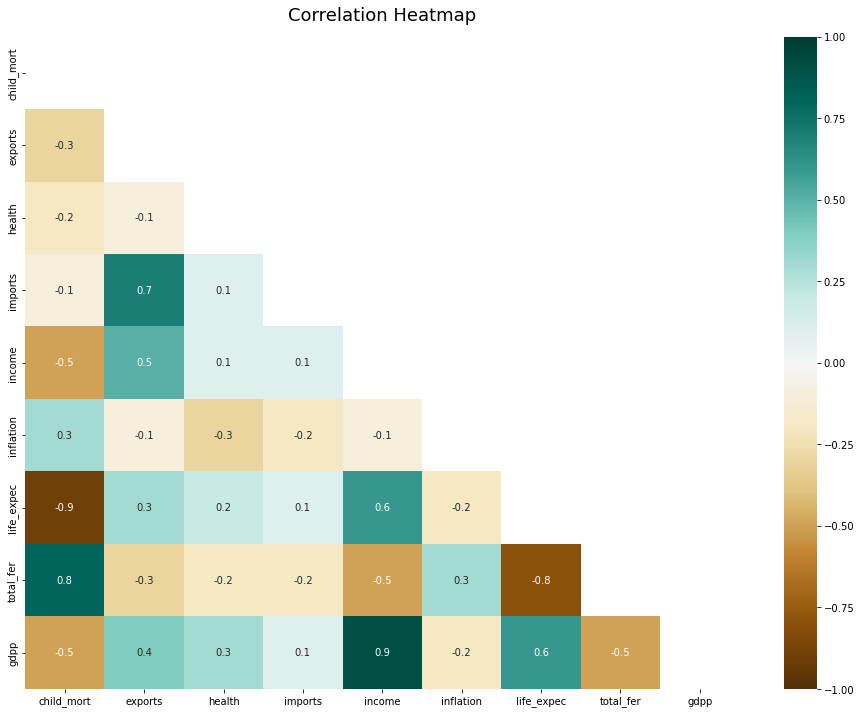

In [7]:
plt.figure(figsize=(16, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(round(df.corr(),1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

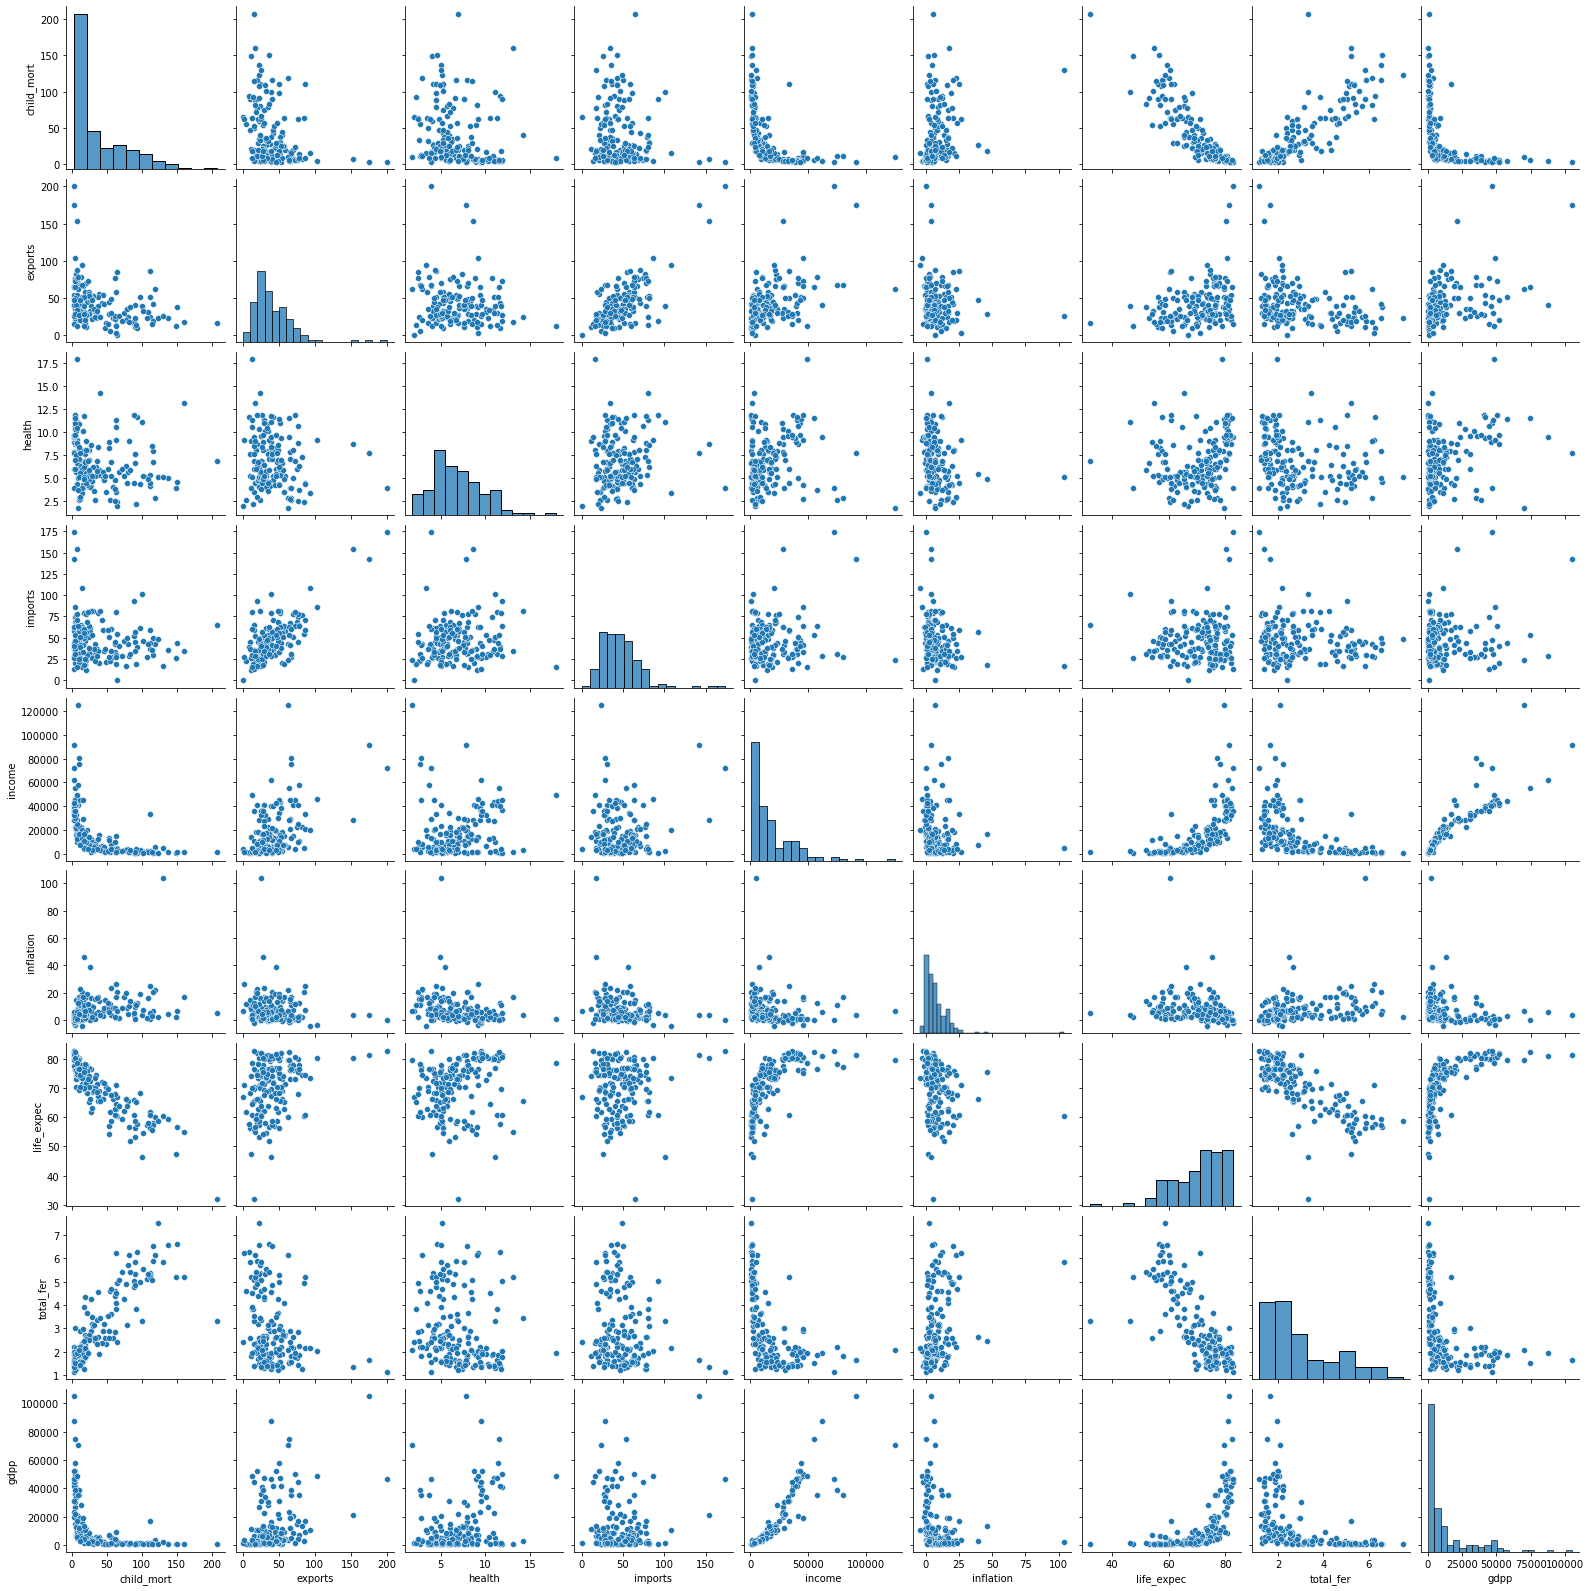

In [8]:
sns.pairplot(df)

In [9]:
df.set_index("country", inplace=True)

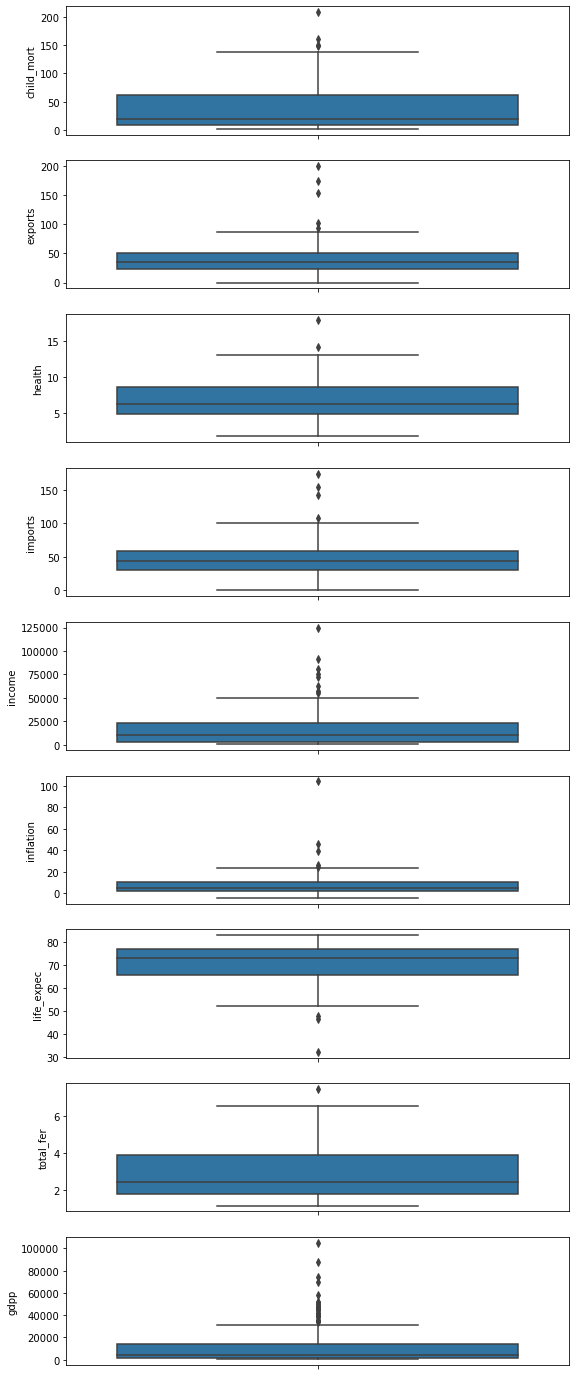

In [10]:
column_names = df.columns
fig, axes = plt.subplots(nrows=len(column_names), figsize=(9, 25))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i], y=column_names[i], data=df)

## Data Preparation

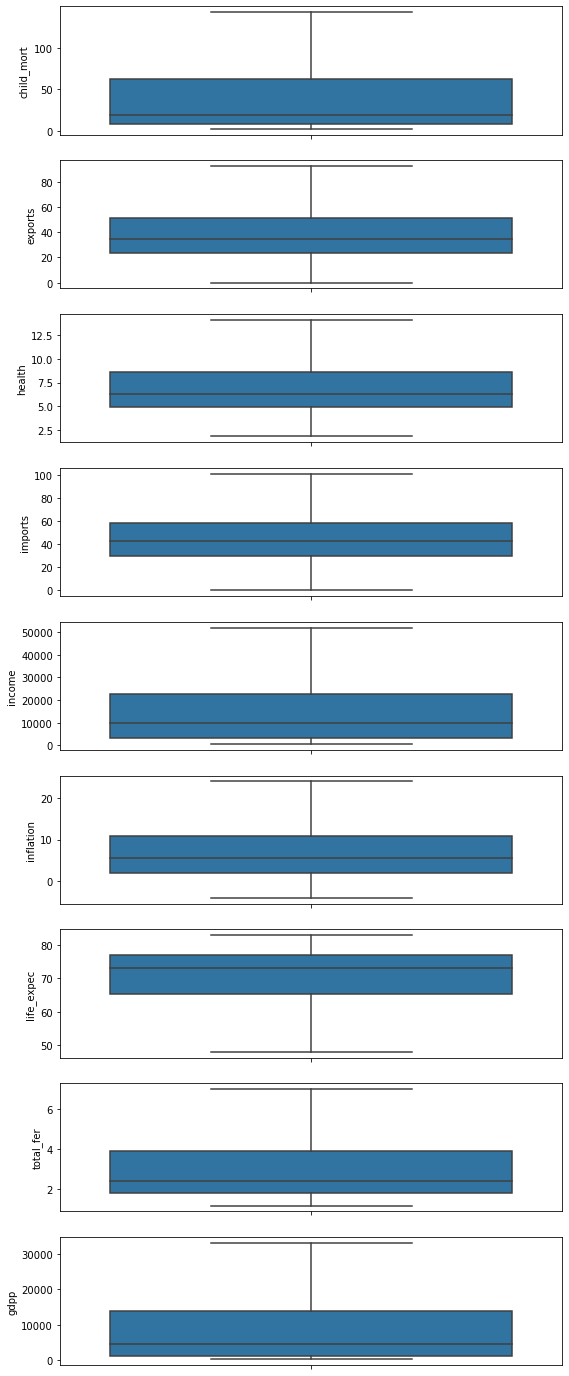

In [11]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

for col in df.columns: 
    lowerbound,upperbound = outlier_treatment(df[col])
    df[col] = np.clip(df[col],a_min=lowerbound,a_max=upperbound)
    
column_names = df.columns
fig,axes = plt.subplots(nrows=len(column_names),figsize=(9,25))

for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y = column_names[i],data=df)

In [12]:
sc = StandardScaler()
X = sc.fit_transform(df)

## Modeling

### K-Means

In [13]:
from sklearn.cluster import KMeans

In [14]:
k_means = KMeans(n_clusters=3, random_state=123)
y_kmeans = k_means.fit_predict(X)

C:\Users\elwin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
y_kmeans

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [57]:
KM_Status = []
for i in range(df.shape[0]):
    if df.KM_Status[:][i] == 0:
        KM_Status.append('developing')
    elif df.KM_Status[:][i] == 1:
        KM_Status.append('developed')
    else:
        KM_Status.append('underdeveloped')
df['KM_Status'] = KM_Status

In [58]:
df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_Status,HC_Status
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,underdeveloped,underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,developed,developed
Algeria,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0,developed,developed
Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,underdeveloped,underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,developed,developing
Argentina,14.5,18.9,8.10,16.0,18700.0,20.900,75.8,2.37,10300.0,developed,developed
Armenia,18.1,20.8,4.40,45.3,6700.0,7.770,73.3,1.69,3220.0,developed,developed
Australia,4.8,19.8,8.73,20.9,41400.0,1.160,82.0,1.93,33130.0,developing,developing
Austria,4.3,51.3,11.00,47.8,43200.0,0.873,80.5,1.44,33130.0,developing,developing


In [18]:
df['KM_Status'].value_counts()

1    79
2    47
0    41
Name: KM_Status, dtype: int64

### Hierarchical Clustering

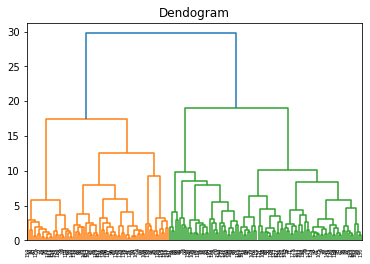

In [19]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.show()

In [20]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [21]:
y_hc

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2], dtype=int64)

In [55]:
HC_Status = []
for i in range(df.shape[0]):
    if df.HC_Status[:][i] == 0:
        HC_Status.append('developing')
    elif df.HC_Status[:][i] == 1:
        HC_Status.append('developed')
    else:
        HC_Status.append('underdeveloped')
df['HC_Status'] = HC_Status

In [59]:
df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KM_Status,HC_Status
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,underdeveloped,underdeveloped
Albania,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,developed,developed
Algeria,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0,developed,developed
Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,underdeveloped,underdeveloped
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,developed,developing
Argentina,14.5,18.9,8.10,16.0,18700.0,20.900,75.8,2.37,10300.0,developed,developed
Armenia,18.1,20.8,4.40,45.3,6700.0,7.770,73.3,1.69,3220.0,developed,developed
Australia,4.8,19.8,8.73,20.9,41400.0,1.160,82.0,1.93,33130.0,developing,developing
Austria,4.3,51.3,11.00,47.8,43200.0,0.873,80.5,1.44,33130.0,developing,developing


### PCA

In [60]:
pca = PCA(n_components=1)

In [61]:
social = df.drop(['exports', 'imports', 'income', 'inflation', 'gdpp', 'KM_Status', 'HC_Status'], axis = 1)
economics = df.drop(['child_mort', 'health', 'life_expec', 'total_fer', 'KM_Status', 'HC_Status'], axis = 1)

In [62]:
social_pca = pca.fit_transform(social)
economics_pca = pca.fit_transform(economics)

In [63]:
df_soc_pca = pd.DataFrame(data = social_pca, columns = ['social'])
df_soc_pca.set_index(data['country'], inplace = True)
df_eco_pca = pd.DataFrame(data = economics_pca, columns = ['economics'])
df_eco_pca.set_index(data['country'], inplace = True)

In [64]:
X = df.drop(['KM_Status', 'HC_Status'], axis=1)

In [65]:
y = df['KM_Status']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [68]:
explained_variance

array([0.97820645, 0.02178869])

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
visual_data = pd.concat([df['KM_Status'], df['HC_Status']], axis = 1)

In [73]:
visual_data = pd.concat([visual_data, df_soc_pca, df_eco_pca], axis = 1)

In [74]:
visual_data

,KM_Status,HC_Status,social,economics
country,,,,
Afghanistan,underdeveloped,underdeveloped,54.358072,-17326.279085
Albania,developed,developed,-21.815868,-8553.607435
Algeria,developed,developed,-11.287537,-5959.397556
Angola,underdeveloped,underdeveloped,81.918922,-12108.561961
Antigua and Barbuda,developed,developing,-28.065164,3650.872146
...,...,...,...,...
Vanuatu,developed,developing,-6.805841,-14801.191200
Venezuela,developed,developed,-21.099480,2357.488359
Vietnam,developed,developing,-14.621794,-14570.916414


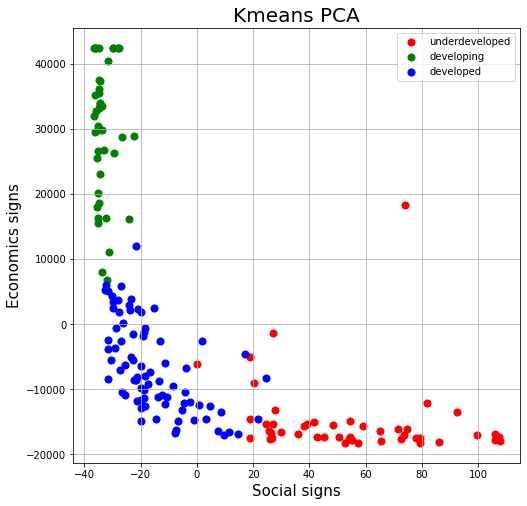

In [75]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Social signs', fontsize = 15)
ax.set_ylabel('Economics signs', fontsize = 15)
ax.set_title('Kmeans PCA', fontsize = 20)
targets = ['underdeveloped', 'developing', 'developed']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = visual_data['KM_Status'] == target
    ax.scatter(visual_data.loc[indicesToKeep, 'social']
               , visual_data.loc[indicesToKeep, 'economics']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

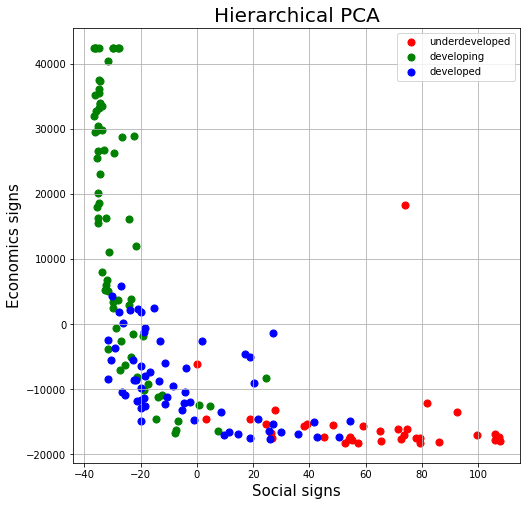

In [76]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Social signs', fontsize = 15)
ax.set_ylabel('Economics signs', fontsize = 15)
ax.set_title('Hierarchical PCA', fontsize = 20)
targets = ['underdeveloped', 'developing', 'developed']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = visual_data['HC_Status'] == target
    ax.scatter(visual_data.loc[indicesToKeep, 'social']
               , visual_data.loc[indicesToKeep, 'economics']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()